<a href="https://colab.research.google.com/github/Rushabhbhagat08/InternSavy/blob/main/Use_Clustering_Techniques_for_the_any_customer_dataset_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>PROJECT NAME : Use Clustering Techniques for the any customer dataset using machine learning</u>

##Project summery :
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

#K means Clustering
Unsupervised Machine Learning learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.

We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm; an unsupervised learning algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.

##Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

#*Let's Begin !*

**Import Libraries**

In [ ]:
# load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings; warnings.simplefilter('ignore')

**Load csv File Dataset**

In [ ]:
#load dataset
Customer_data=pd.read_csv('/content/drive/MyDrive/InternSavy/Customer segementation/Mall_Customers.csv')

**Dataset First View**

In [ ]:
#see the top row from the dataset
Customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#see the last row from the dataset
Customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**Dataset Rows & Columns count**

In [ ]:
#Dataset shape and size
rows=Customer_data.shape[0]
columns=Customer_data.shape[1]
print(f"The number of rows is {rows} and number of columns is {columns}.")

The number of rows is 200 and number of columns is 5.


**Dataset Information**

In [ ]:
#Dataset Information
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Duplicate Value**

In [ ]:
# see the duplicate values count
Customer_data['CustomerID'].value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64

**Missing Values/Null Values**

In [ ]:
#missing and null values count
Customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##**Understand the dataset**

In [ ]:
#describe the dataset
Customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Dataset Columns
Customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

###Variables Description

1. Customer ID : A unique value of each customers
2. Gender : gender of the customers
3. Age : Age of the customers.
4. Annual Income : Individual annual income of each customer
5. Spending Score : Total spending in each customer.


#**ML Implementations**

In [ ]:
# drop unwanted columns
drop_data=Customer_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

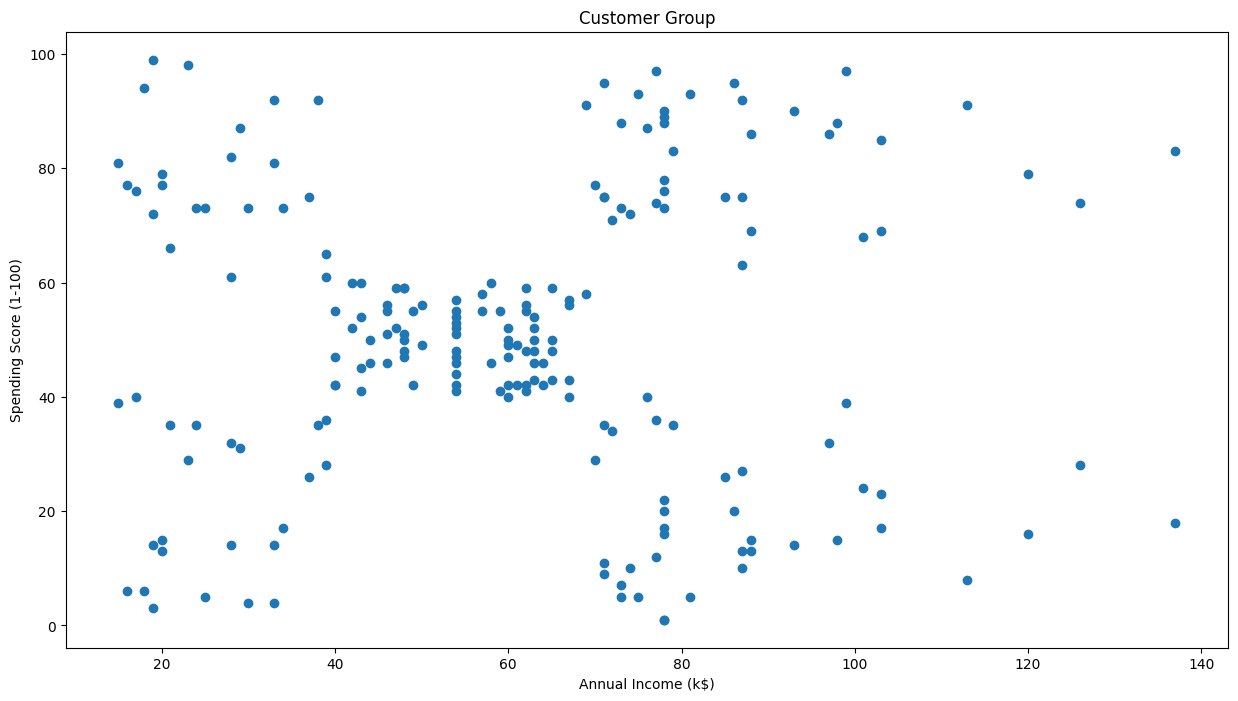

In [ ]:
#Plot the scatter plot
plt.figure(figsize=(15,8))
plt.scatter(drop_data[:,0],drop_data[:,1])
plt.title("Customer Group")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

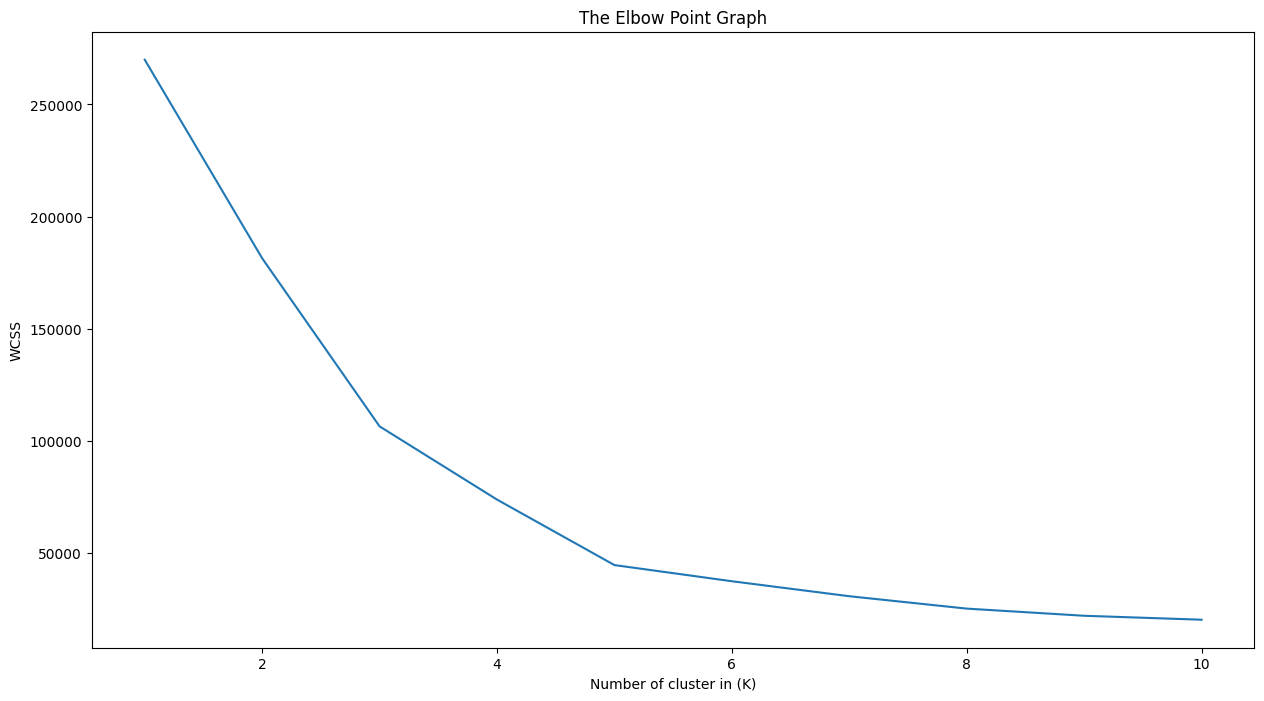

In [ ]:
# find the number of custer
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
  kmeans.fit(drop_data)
  WCSS.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of cluster in (K)")
plt.ylabel('WCSS')
plt.show()

**The WCSS dosent much reduce after k=5, so we choose k as a perfect k value or clusers**

In [ ]:
# use k-means algorithm
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(drop_data)

**Centroid Point**

In [ ]:
# print the centriod value of the cluster
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

**Visulization The code**

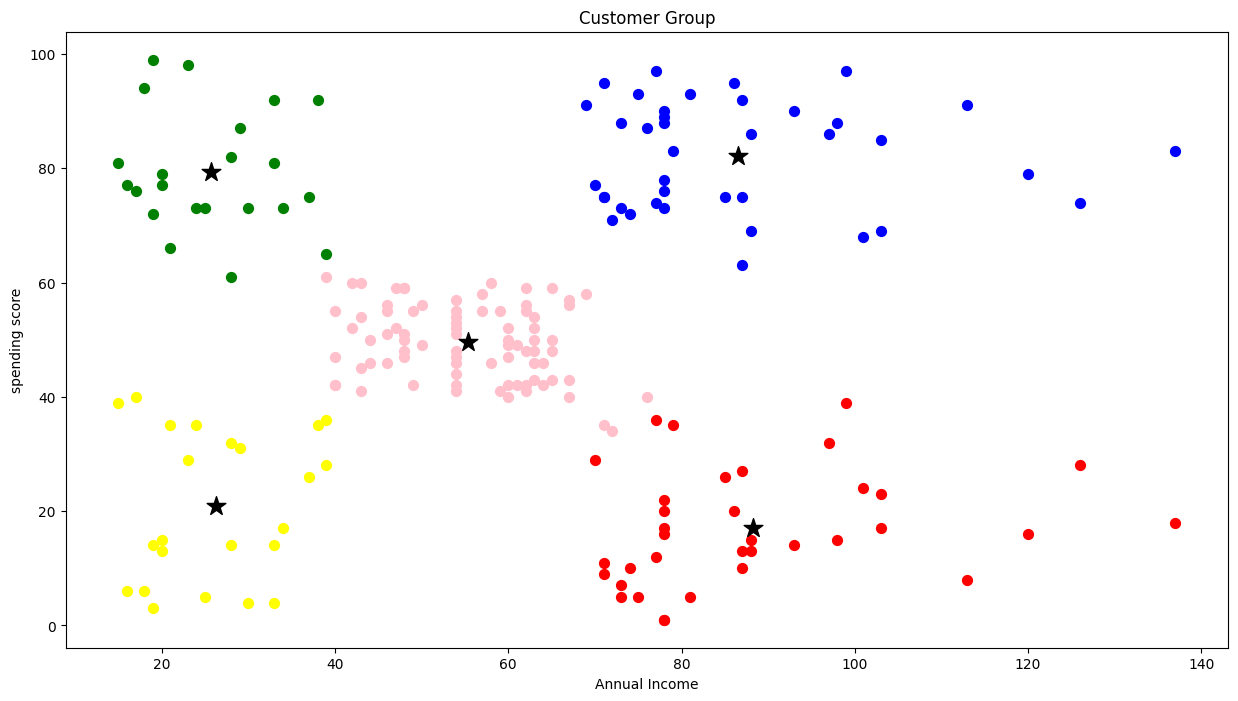

In [ ]:
# plot the clustering data
plt.figure(figsize=(15,8))
plt.scatter(drop_data[y==0,0],drop_data[y==0,1],s=50,c='red',label='cluster 1')
plt.scatter(drop_data[y==1,0],drop_data[y==1,1],s=50,c='pink',label='cluster 2')
plt.scatter(drop_data[y==2,0],drop_data[y==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(drop_data[y==3,0],drop_data[y==3,1],s=50,c='green',label='cluster 4')
plt.scatter(drop_data[y==4,0],drop_data[y==4,1],s=50,c='yellow',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Center', marker='*')
plt.title('Customer Group')
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.show()

#Conclusion

1. we are implement one of the most famous clustering algorithms : k-means
2. The Black points indicates the centroid of the clusters.
3. using elbow method to find the clusters.

#**Hurrah! You have successfully completed your K-Means clustering Project !!!**